# Исследование продаж компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План исследования:

1. Открытие файла с данными и изучение общей информации

2. Подготовка данных
* Замена названия столбцов (приведение к нижнему регистру);
* Преобразование данных в нужные типы.
* Обработка пропусков;
* Посчитать суммарные продажи во всех регионах.

3. Исследовательский анализ данных
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами, построить распределение по годам. Определить характерное  время жизни платформы.
* Определить период актуальный для прогноза на 2017 г.
* Какие платформы лидируют по продажам, растут или падают? Определить потенциально прибыльные платформы.
* Проанализировать распределение и его границы («ящик с усами») по глобальным продажам игр в разбивке по платформам. 
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
* Проанализировать общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

4. Портрет пользователя каждого региона
* Определить для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

5. Сформулировать и проверить гипотезы
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


6. Общий вывод

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
pd.set_option('display.float_format', '{:,.2f}'.format)

## Открытие файла с данными и изучение общей информации

In [2]:
df = pd.read_csv('f:/yandex-practicum/datasets/games.csv')
display(df.head()) 
df.info() # просмотр размера таблицы, типов данных, количества non-null
df.columns # проверка отсутсвия лишних пробелов в названии столбцов


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Размер данных 19715х11, есть пропуски, для части столбцов целесообразно преобразовать тип данных, необходимо переименовать названия столбцов

## Подготовка данных

План
* Замена названия столбцов (приведение к нижнему регистру);
* Преобразование данных в нужные типы.
* Обработка пропусков;
* Посчитать суммарные продажи во всех регионах


### Замена названия столбцов 

In [3]:
# переименование столбцов в змеимый регистр
df.columns = df.columns.str.lower()
df.columns # проверка переименования

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

In [4]:
# Преобразование данных в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.
df['year_of_release']= df['year_of_release'].astype('Int32') #меняю год из вещественных в целые
df['critic_score']= df['critic_score'].astype('Int32') #меняю рейтинг из вещественных в целые
df.head()
# После замены пропусков в столбце пользовательских оценок можно будет заменить на вещественные

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


### Обработка пропусков

In [5]:
df.isna().sum()
#количество пропусков в столбцах

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

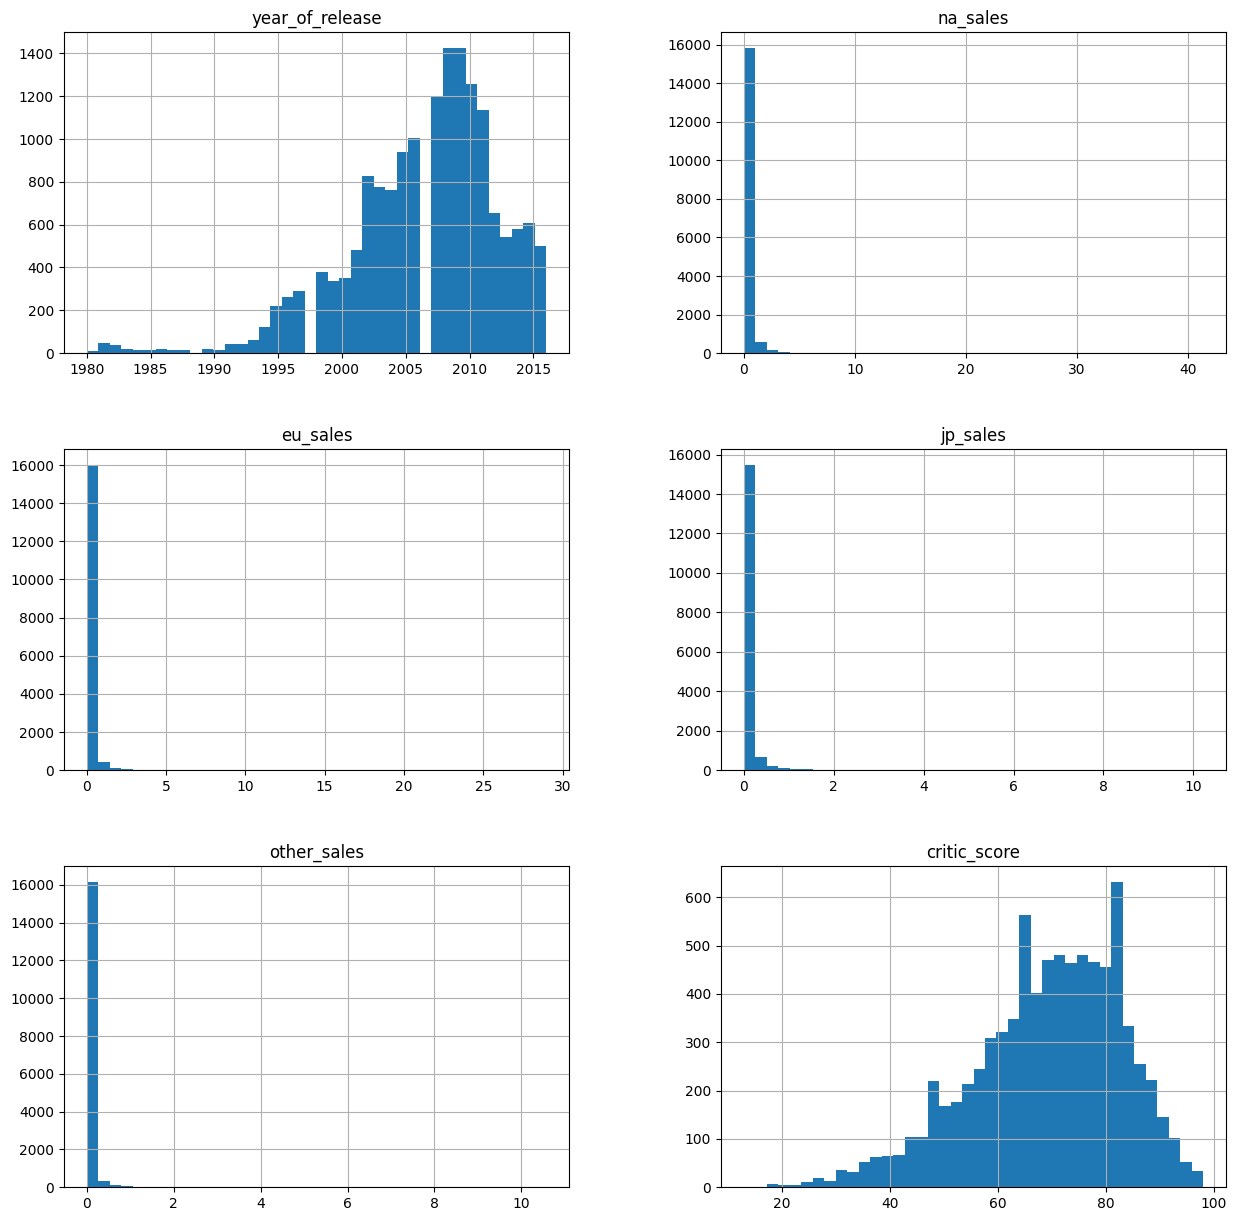

In [6]:
df.hist(bins=40,figsize=(15,15));

In [7]:
# расчет продаж для игр без года
df_without_year = df[df['year_of_release'].isna()].fillna(0)
df_without_year['sum_sales'] = df_without_year['na_sales'] + df_without_year['eu_sales'] + df_without_year['jp_sales'] + df_without_year['other_sales']
df_without_year['sum_sales'].sum()

98.91999999999999

In [8]:
# исключение пропусков в годах релиза и названии
display(df[df['year_of_release'].isna()==True])
df = df.dropna(subset=['name','year_of_release'])
df.isna().sum()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43,tbd,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [9]:
print('Явных дубликатов', df.duplicated().sum())
# поиск дубликатов, явных дубликатов нет
print('Уникальных имен игр', len(df['name'].unique()))

Явных дубликатов 0
Уникальных имен игр 11426


В пользовательском рейтинге tbd (To Be Determined) обозначает, что рейтинг еще не определен

In [10]:
# Вывод количества игр с неопределенным рейтингом по платформам
#print('Игры с еще не определенным рейтингом по платформам\n',df[df['user_score']=='tbd'].groupby('platform')['name'].count())
#print('Все игры по платформам\n', df.groupby('platform')['name'].count())
# заполнение всех незаполненных рейтингов "NotRated"
df['user_score'].loc[df['user_score']=='tbd'] = None
df['rating'].fillna('NotRated',inplace=True)

In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [12]:
for col_l in ['critic_score', 'user_score']:
    print('-------------------------')  
    print(col_l, df[col_l].sort_values().unique())
    print(col_l,' : кол-во 0:', df[df[col_l] == 0][col_l].count(),
        ', процент 0:', round(df[df[col_l] == 0][col_l].count()/len(df)*100, 2),'%')
    print(col_l,': кол-во NaN:',df[col_l].isna().sum(),
        ', процент NaN:', round(df[col_l].isna().sum()/len(df)*100, 2),'%')

-------------------------
critic_score <IntegerArray>
[  13,   17,   19,   20,   21,   23,   24,   25,   26,   27,   28,   29,   30,
   31,   32,   33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
   44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,   56,
   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,   67,   68,   69,
   70,   71,   72,   73,   74,   75,   76,   77,   78,   79,   80,   81,   82,
   83,   84,   85,   86,   87,   88,   89,   90,   91,   92,   93,   94,   95,
   96,   97,   98, <NA>]
Length: 82, dtype: Int32
critic_score  : кол-во 0: 0 , процент 0: 0.0 %
critic_score : кол-во NaN: 8461 , процент NaN: 51.45 %
-------------------------
user_score ['0' '0.2' '0.3' '0.5' '0.6' '0.7' '0.9' '1' '1.1' '1.2' '1.3' '1.4' '1.5'
 '1.6' '1.7' '1.8' '1.9' '2' '2.1' '2.2' '2.3' '2.4' '2.5' '2.6' '2.7'
 '2.8' '2.9' '3' '3.1' '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '4'
 '4.1' '4.2' '4.3' '4.4' '4.5' '4.6' '4.7' '4.8' '4.9' '5' '5.

In [13]:
# заполнение пропусков critic_score и user_score заглушками -1 
df.fillna(-1,inplace=True)
# преобразование типа
df['user_score'] = df['user_score'].astype('float64')


In [14]:
df.reset_index(drop=True,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int32(2), float64(5), object(4)
memory usage: 1.3+ MB


### Суммарные продажи во всех регионах

In [15]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.00,NotRated,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.00,NotRated,31.38


array([[<AxesSubplot:title={'center':'year_of_release'}>,
        <AxesSubplot:title={'center':'na_sales'}>,
        <AxesSubplot:title={'center':'eu_sales'}>],
       [<AxesSubplot:title={'center':'jp_sales'}>,
        <AxesSubplot:title={'center':'other_sales'}>,
        <AxesSubplot:title={'center':'critic_score'}>],
       [<AxesSubplot:title={'center':'user_score'}>,
        <AxesSubplot:title={'center':'sum_sales'}>, <AxesSubplot:>]],
      dtype=object)

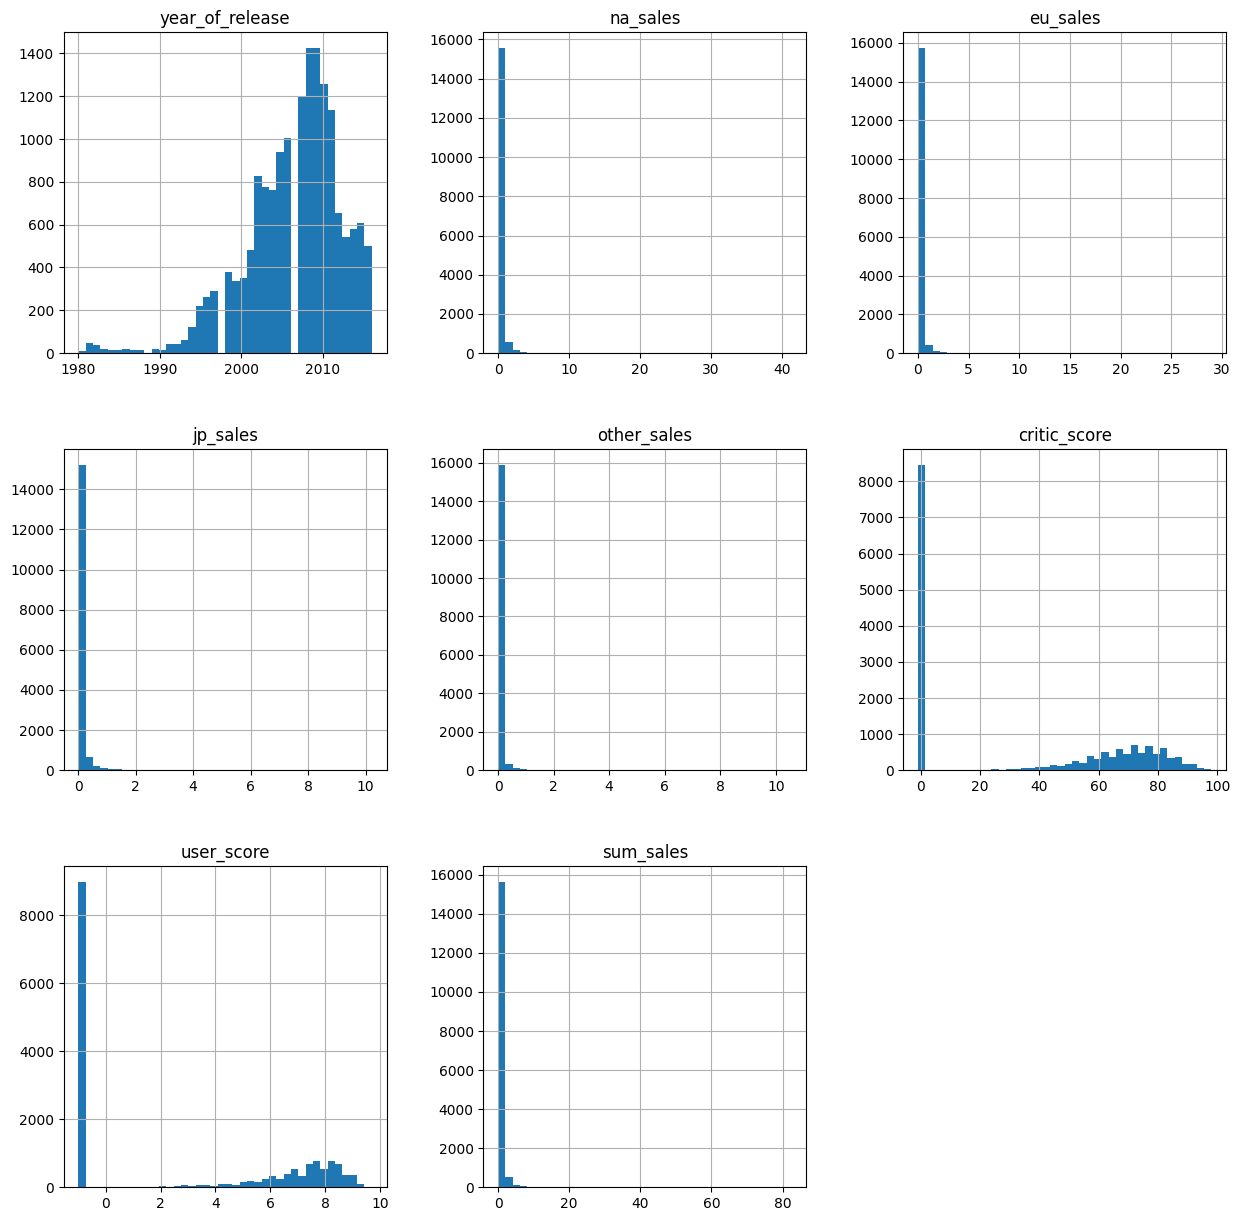

In [16]:
df.hist(bins=40,figsize=(15,15))

In [17]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
count,"16,444.00","16,444.00","16,444.00","16,444.00","16,444.00","16,444.00","16,444.00","16,444.00"
mean,"2,006.49",0.26,0.15,0.08,0.05,32.98,2.69,0.54
std,5.88,0.82,0.51,0.31,0.19,36.30,4.17,1.56
min,"1,980.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.00
25%,"2,003.00",0.00,0.00,0.00,0.00,-1.00,-1.00,0.06
50%,"2,007.00",0.08,0.02,0.00,0.01,-1.00,-1.00,0.17
75%,"2,010.00",0.24,0.11,0.04,0.03,70.00,7.30,0.47
max,"2,016.00",41.36,28.96,10.22,10.57,98.00,9.70,82.54


In [18]:
# Проверка после всех преобразований
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(df.info())
for col_l in list_c:
    print('-------------------------')  
    print(col_l, (df[col_l].sort_values().unique()))
    print(col_l,' : кол-во 0:', df[df[col_l] == 0][col_l].count(),
        ', процент 0:', round(df[df[col_l] == 0][col_l].count()/len(df)*100, 2),'%')
    print(col_l,': кол-во NaN:',df[col_l].isna().sum(),
        ', процент NaN:', round(df[col_l].isna().sum()/len(df)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  Int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: Int32(2), float64(6), object(4)
memory usage: 1.4+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Вывод

Заменены названия столбцов (приведены к нижнему регистру);
Преобразованы данных в целые и вещественные типы. 
Пропуски в названиях игр и годах выпуска удалены, т.к. таких пропусков мало (2 и 269 из 16000строк).
Значения tbd (рейтинг еще не определен) заменен на "NotRated", а пропуски в оценках заполнены -1 (около половины записей были без оценки)

## Исследовательский анализ данных

План
* Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами, построить распределение по годам. Определить характерное  время жизни платформы.
* Определить период актуальный для прогноза на 2017 г.
* Какие платформы лидируют по продажам, растут или падают? Определить потенциально прибыльные платформы.
* Проанализировать распределение и его границы («ящик с усами») по глобальным продажам игр в разбивке по платформам. 
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
* Проанализировать общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


### Сколько игр выпускалось в разные годы


In [19]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

[Text(0.5, 0, 'year')]

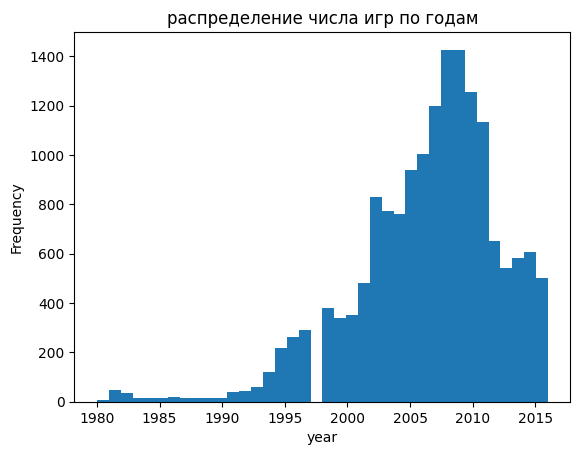

In [20]:
df['year_of_release'].plot(kind='hist',bins=38,title='раcпределение числа игр по годам').set(xlabel='year')

#### Вывод 

Распределение числа компьютерных игр имеет сложный характер:
- в период "зарождения" до 1993 г. выпускалось не более 100 игр в год
- с 1994 быстрый рост числа выпускаемых в год игр со 100 до 1400 в 2008,2009 гг.
- 2009-2012 гг. резкий спад 
- в 2012-2016 равномерное распределение, ежегодно выпускалось по 500-600 игр.
Отвечая на вопрос "Важны ли данные за все периоды?" можно предположить, что наиболее репрезентативны данные за последний равномерный период 2012-2016 гг.

### Как менялись продажи по платформам

* Как менялись продажи по платформам. Определить платформы с наибольшими суммарными продажами, построить распределение по годам. Определить характерное  время жизни платформы.
* Определить период актуальный для прогноза на 2017 г.
* Какие платформы лидируют по продажам, растут или падают? Определить потенциально прибыльные платформы.

In [21]:
#Сводная таблица  суммарных продаж по годам и платфрмам
platform_pivot0 = (df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum'))
platform_pivot0.fillna('')


platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,,,,,,,,,,...,,,,,,,,,,
1981,35.68,,,,,,,,,,...,,,,,,,,,,
1982,28.88,,,,,,,,,,...,,,,,,,,,,
1983,5.84,,,,,,,,,,...,,,,,,,,,,
1984,0.27,,,,,,,,,,...,,,,,,,,,,
1985,0.45,,,,0.02,,,,,,...,,,,,,,,,,
1986,0.67,,,,,,,,,,...,,,,,,,,,,
1987,1.94,,,,,,,,,,...,,,,,,,,,,
1988,0.74,,,,,1.43,,,,,...,,,,,,,,,,


In [22]:
# Платформы с наибольшим числом продаж за все годы
#platform_pivot0.sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(5,5))
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2    1,233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Платформы с малым количеством продаж (<0.5%) исключаю из рассмотрения
1. SAT       33.59
2. GEN       28.35
3. DC        15.95
4. SCD        1.86
5. NG         1.44
6. WS         1.42
7. TG16       0.16
8. 3DO        0.10
9. GG         0.04
10. PCFX       0.03

<AxesSubplot:ylabel='sum_sales'>

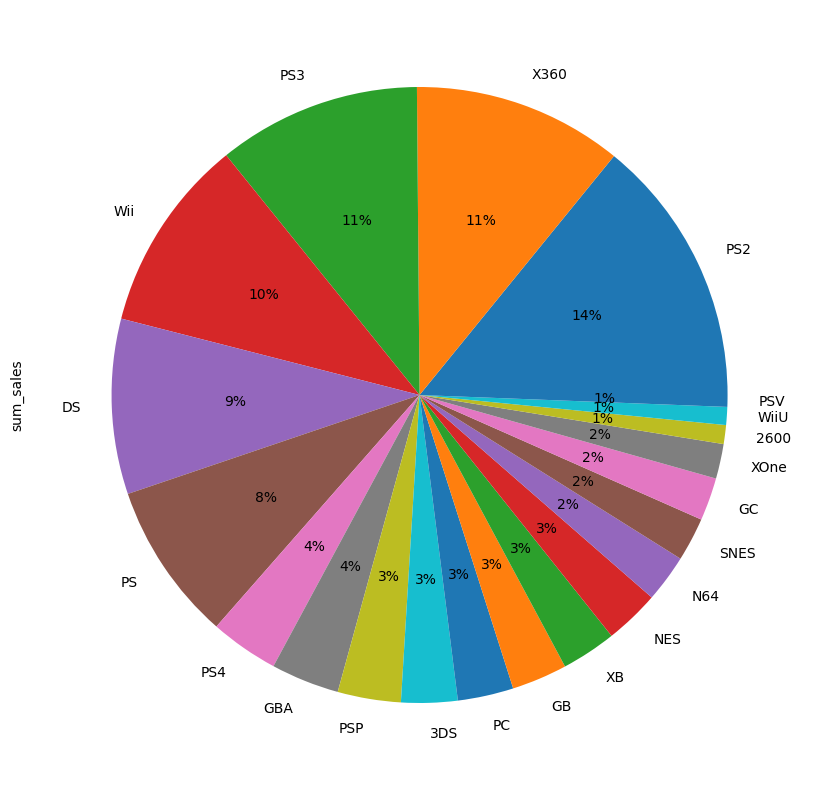

In [23]:
df=df.query('platform not in ("SAT","GEN","DC","SCD","NG","WS","TG16","3DO","GG","PCFX")')
df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).plot(kind='pie',autopct='%1.0f%%',figsize=(10,10))

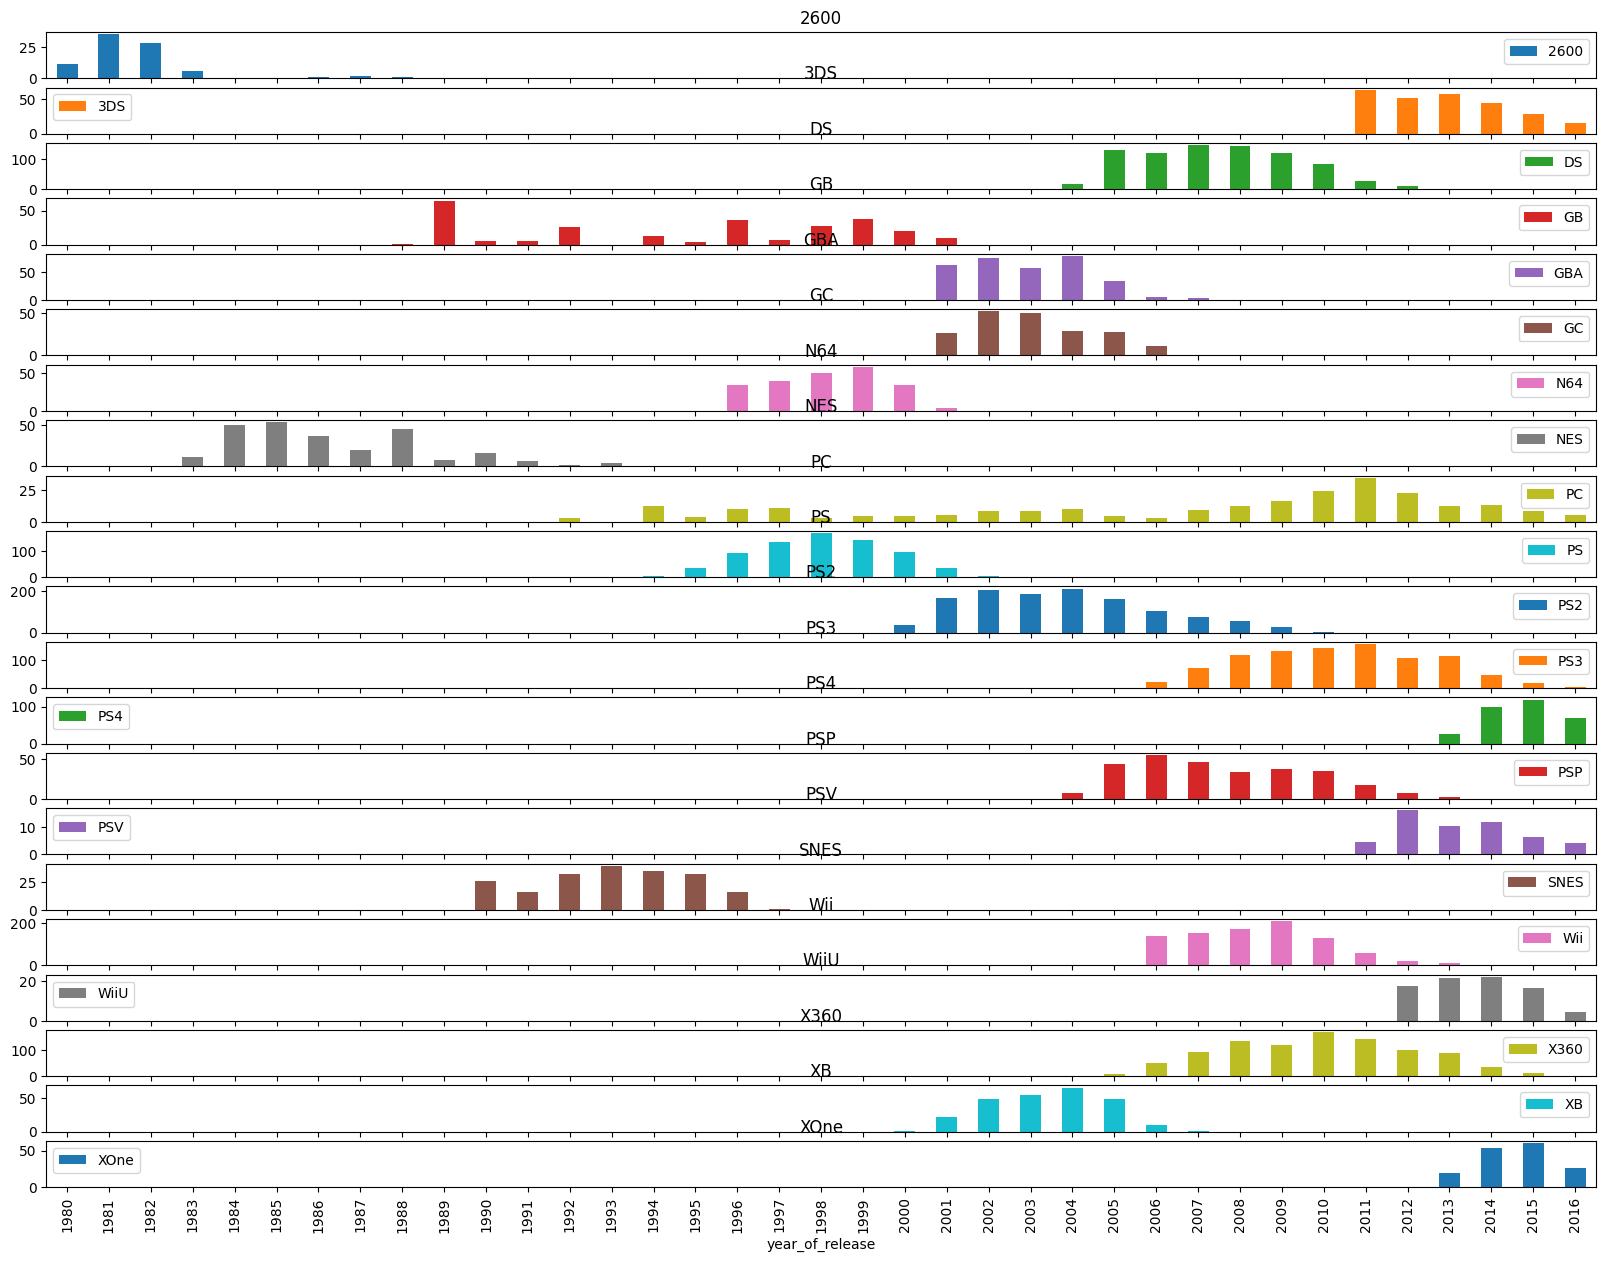

In [24]:
platform_pivot1 = (df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum'))
platform_pivot1.plot.bar(subplots=True,figsize=(20,15));

In [25]:
# срок жизни платформы
print(platform_pivot0.count().sort_values(ascending=False))
pd.DataFrame(
    {
    'all': platform_pivot0.count(),
    'good': platform_pivot1.count()
    }).describe()

platform
PC      26
GB      13
NES     12
X360    12
PSP     12
PS2     12
Wii     11
DS      11
PS3     11
2600    10
SNES    10
PS      10
XB       9
GBA      8
DC       7
GC       7
N64      7
SAT      6
3DS      6
PSV      6
WiiU     5
GEN      5
NG       4
PS4      4
XOne     4
WS       3
SCD      2
3DO      2
TG16     1
GG       1
PCFX     1
dtype: int64


,all,good
count,31.00,21.00
mean,7.68,9.81
std,5.08,4.66
min,1.00,4.00
25%,4.00,7.00
50%,7.00,10.00
75%,11.00,12.00
max,26.00,26.00


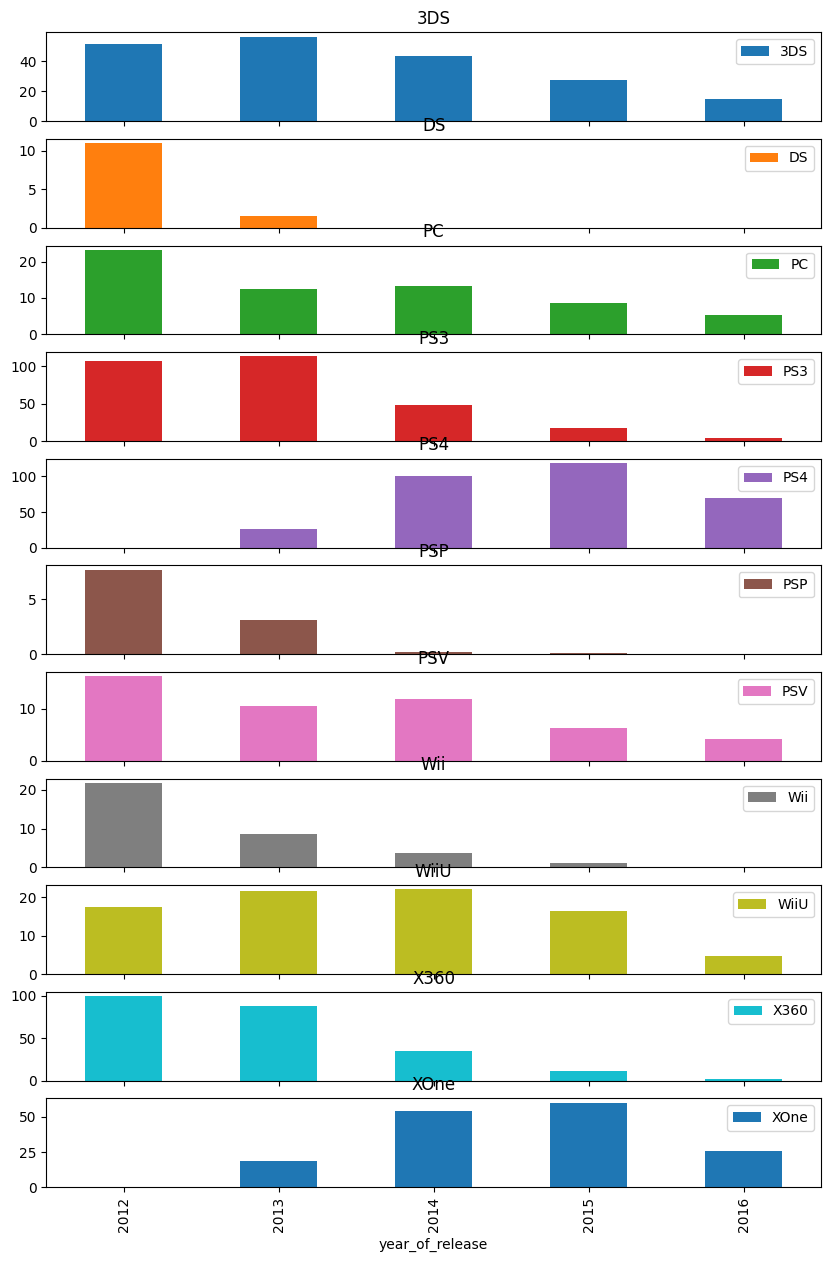

In [26]:
# Какие платформы лидируют по продажам, растут или падают? потенциально прибыльные платформы.
df = df.query('year_of_release >= 2012')
platform_pivot2 = (df.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum'))
platform_pivot2.plot.bar(subplots=True,figsize=(10,15));

<AxesSubplot:ylabel='2016'>

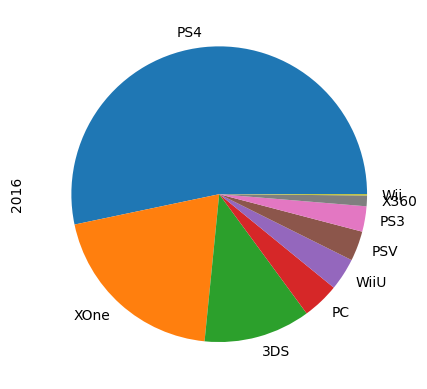

In [27]:
platform_pivot0.loc[2016].sort_values(ascending=False).dropna().plot.pie()

#### Вывод 

Продажи на ПК были 26 лет, на 3х платформах продажи были только по одному году.

Для всех платформ средняя и медианная длительности продаж составили 7,68 и 7 лет.

10 платформ из 31 имеют менее 0.5% продаж, исключаю их из рассмотрения.

Для "успешных" платформ средняя и медианная длительности продаж составили 9,81 и 10 лет.

В качестве актуального периода принимается период 2012-2016гг - период равномерного распределиния числа игр по годам.

К концу актуального периода используются платформы 3DS, PC, PS4, XOne (PS3, X360 практически вышли из употребления), а также мало популярные PSV и WiiU. Построены распределения для упешных платформ, популярность всех платформ падает. 

Потенциально наиболее прибыльные платформы и их продажи в 2016 г.  **1. PS4 69.25, 2.XOne 26.15, 3. 3DS 15.14**, прочие платформы: PC 5.25,  WiiU 4.60, PSV 4.25, PS3 3.60, X360 1.52, Wii 0.18

### «ящик с усами» по глобальным продажам игр в разбивке по платформам

(0.0, 0.9)

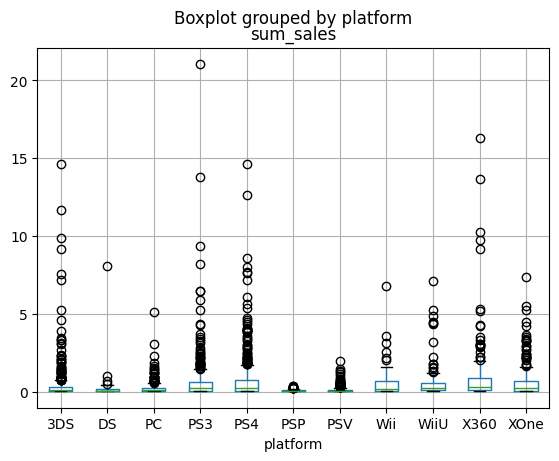

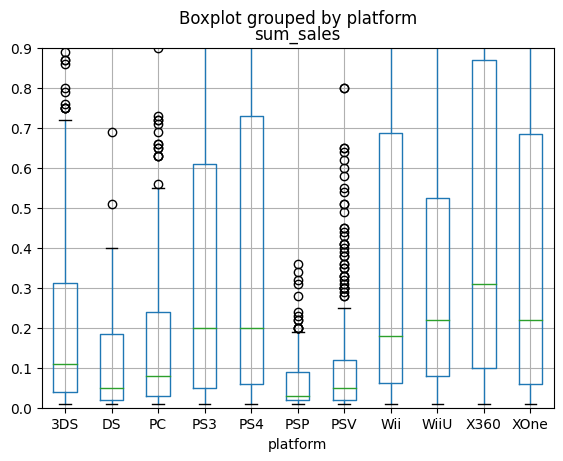

In [28]:
# график суммарных продаж каждой игры по платформам с 2012 г.
df.boxplot(column='sum_sales', by= 'platform') 
df.boxplot(column='sum_sales', by= 'platform').set_ylim([0, 0.9]) 

In [29]:
# Доля игр, выходящих на каждой платформе
(df.groupby('platform')['platform'].count()/df['name'].unique().shape[0]).sort_values(ascending=False)


platform
PS3    0.30
PSV    0.25
3DS    0.24
PS4    0.23
X360   0.17
PC     0.15
XOne   0.15
PSP    0.10
WiiU   0.09
Wii    0.03
DS     0.02
Name: platform, dtype: float64

#### Вывод 
Наибольшее медианное значение глобальных продаж наблюдается для платформы X360
т.е. игра выходящая на X360 более продаваема, но на платформе выходит меньшая доля игр

### Как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы

Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами, сравнить с продажами на других платформах.

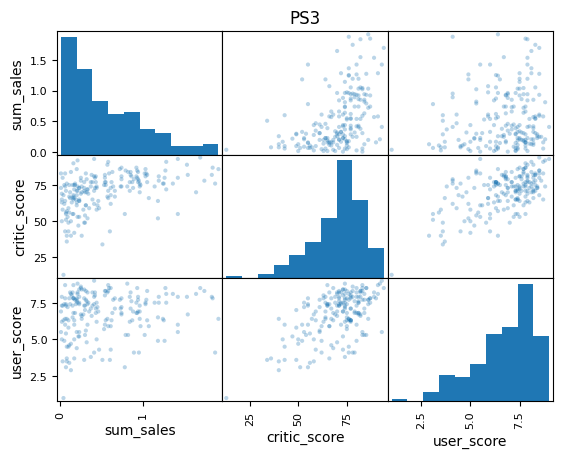

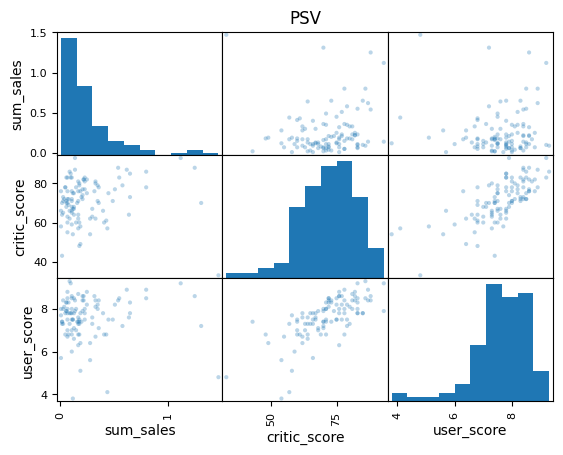

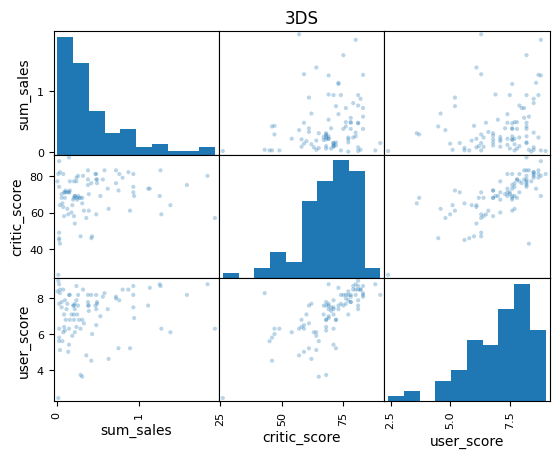

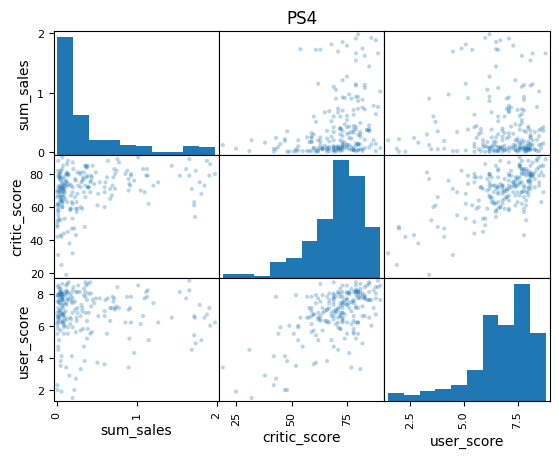

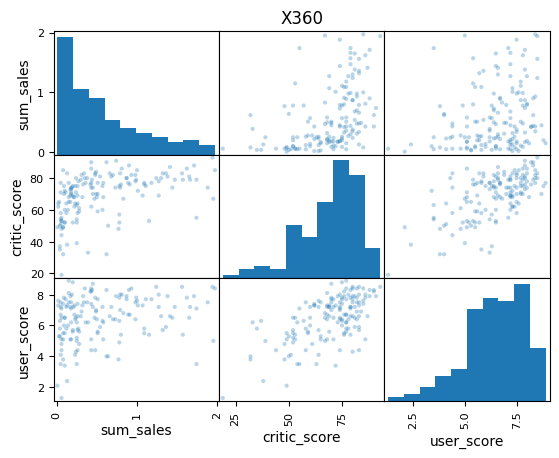

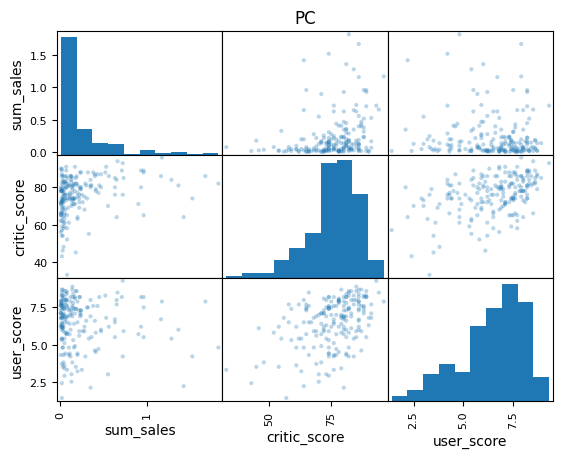

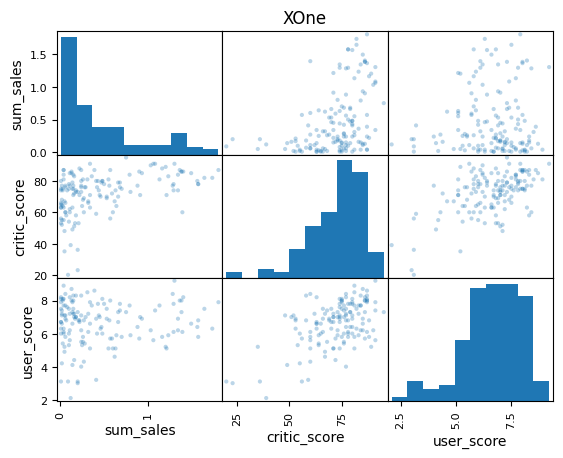

In [30]:
columns_to_scatter=['sum_sales','critic_score','user_score']
for i in ['PS3', 'PSV', '3DS', 'PS4', 'X360', 'PC','XOne']:
    pd.plotting.scatter_matrix(
        df.query('platform == @i and user_score >= 0 and critic_score >= 0 and sum_sales < 2')[columns_to_scatter], 
        alpha = 0.3)[0,1].set_title(i)

In [31]:
for i in ['PS3', 'PSV', '3DS', 'PS4', 'X360', 'PC','XOne']:
    print('платформа', i,'\n',df.query('platform == @i and user_score >= 0 and critic_score >= 0')[columns_to_scatter].corr()['sum_sales'],'\n')

платформа PS3 
 sum_sales      1.00
critic_score   0.33
user_score     0.00
Name: sum_sales, dtype: float64 

платформа PSV 
 sum_sales      1.00
critic_score   0.09
user_score     0.01
Name: sum_sales, dtype: float64 

платформа 3DS 
 sum_sales      1.00
critic_score   0.31
user_score     0.20
Name: sum_sales, dtype: float64 

платформа PS4 
 sum_sales       1.00
critic_score    0.41
user_score     -0.03
Name: sum_sales, dtype: float64 

платформа X360 
 sum_sales       1.00
critic_score    0.36
user_score     -0.00
Name: sum_sales, dtype: float64 

платформа PC 
 sum_sales       1.00
critic_score    0.24
user_score     -0.14
Name: sum_sales, dtype: float64 

платформа XOne 
 sum_sales       1.00
critic_score    0.41
user_score     -0.09
Name: sum_sales, dtype: float64 



#### Вывод 
- Для PS3, PS4, XOne, X360  : количество продаж не коррелирует с пользовательским рейтингом; количество продаж слабо коррелирует с рейтингом критиков.
- Для 3DS коэффициент корреляции продаж с рейтингом критиков ниже, с рейтингом пользователей выше. 
- Для PSV коэффициенты корреляции менее 0,1.
- Для PC очень слабые связи, при этом с пользовательским связь обратная.

- Согласно диаграмам рассеяния для текущих популярных платформ практически нет игр в области высоких продаж и низких рейтингов, т.е. игры с низким рейтингом не будут популярны, однако высокий рейтинг тоже не гарантирует высоких продаж, т.к. область высоких рейтингов и нижних продаж на диаграммах рассеяния не пустая.
Рейтинг критиков по сравнению с рейтингом пользователей имеет меньший разброс на диаграмах рассеяния, и поэтому рейтинг критиков лучше подходит для прогнозирования. Коэффициенты корреляции подтверждают выводы.


### Общее распределение игр по жанрам
Проанализировать общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

genre,Action,Shooter,Role-Playing,Sports,Misc,Platform,Racing,Fighting,Simulation,Adventure,Strategy,Puzzle
sum_sales,441.12,304.73,192.80,181.07,85.04,61.00,53.50,44.49,35.12,29.43,13.34,4.89


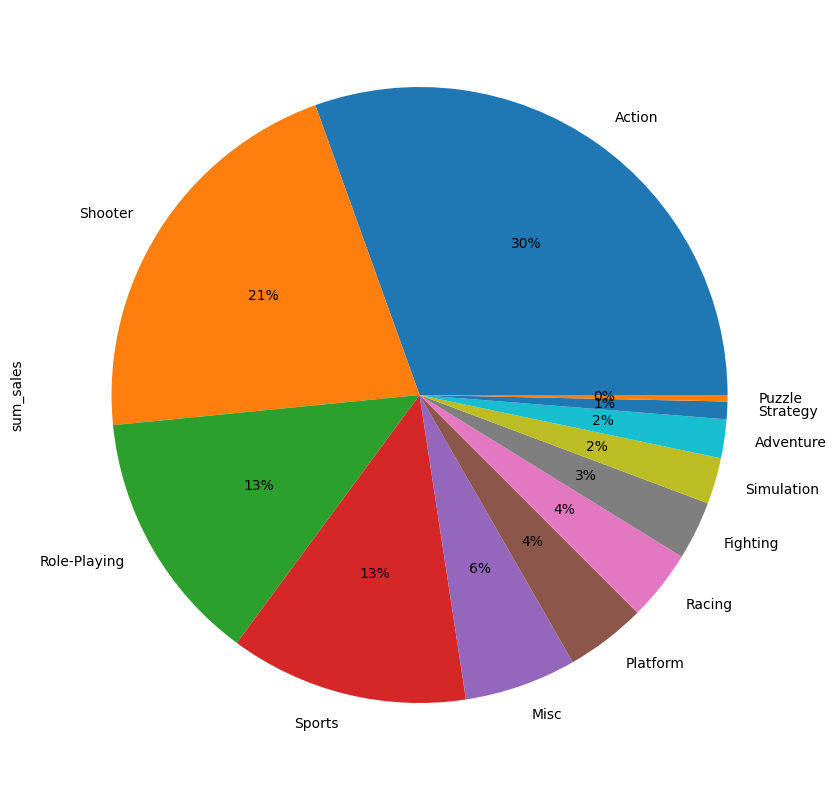

In [32]:
df.pivot_table(index='genre',  values='sum_sales', aggfunc=sum).sort_values(by='sum_sales',ascending=False).plot(kind='pie',y='sum_sales', legend=False,autopct='%1.0f%%',figsize=(10,10))
df.pivot_table(index='genre',  values='sum_sales', aggfunc=sum).sort_values(by='sum_sales',ascending=False).T


(0.0, 1.5)

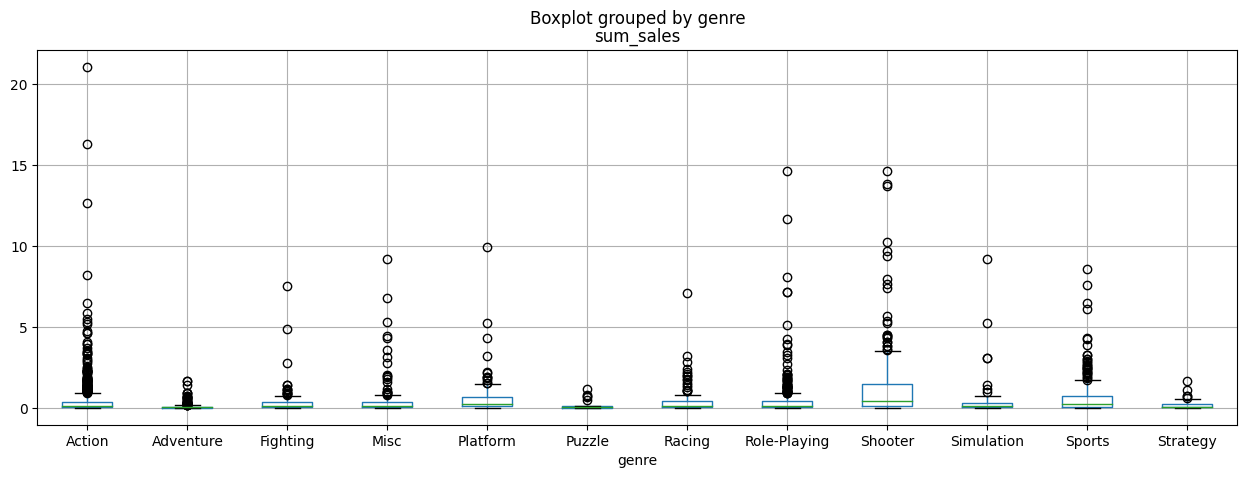

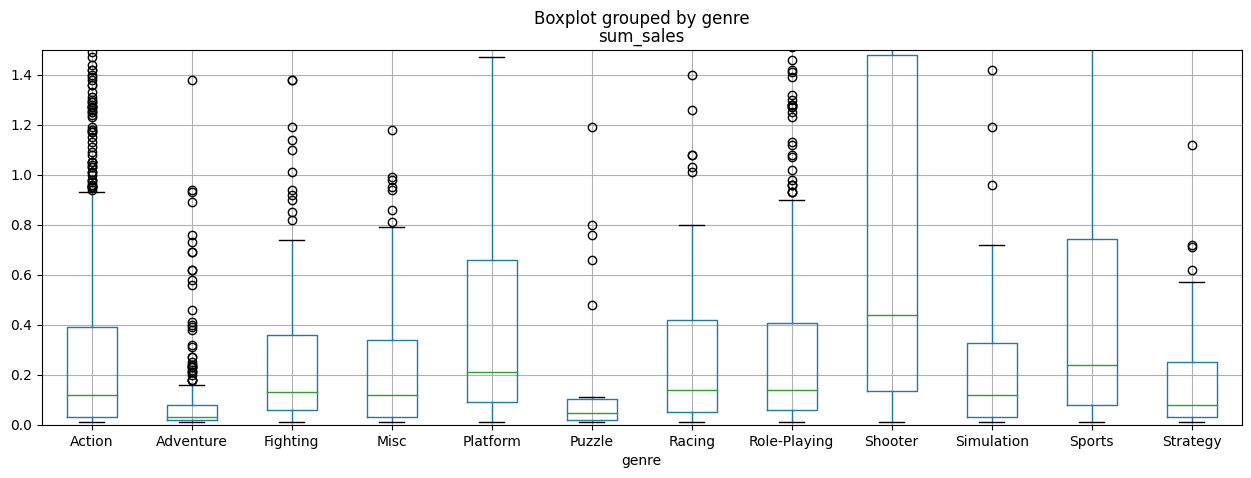

In [33]:
# график суммарных продаж каждой игры по жанрам с 2012 г.
df.boxplot(column='sum_sales', by= 'genre',figsize=(15,5)) 
df.boxplot(column='sum_sales', by= 'genre',figsize=(15,5)) .set_ylim([0, 1.5]) 


In [34]:
df.pivot_table(index='genre',  values='sum_sales', aggfunc='median').sort_values(by='sum_sales',ascending=False).T


genre,Shooter,Sports,Platform,Role-Playing,Racing,Fighting,Action,Misc,Simulation,Strategy,Puzzle,Adventure
sum_sales,0.44,0.24,0.21,0.14,0.14,0.13,0.12,0.12,0.12,0.08,0.04,0.03


#### Вывод 
Наиболее прибыльный жанр Shooter. Жанры с высокими медианными продажами - Sports, Platform, Role-Playing, Racing, с  низкими  Puzzle, Adventure

## Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5) по регионам

'na_sales'

platform
X360   140.05
PS4    108.74
PS3    103.38
XOne    93.12
3DS     55.31
Name: na_sales, dtype: float64

platform,X360,XOne,WiiU,PS4,PS3,Wii,3DS,DS,PC,PSP,PSV
na_sales,0.17,0.12,0.11,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.00


'eu_sales'

platform
PS4    141.09
PS3    106.86
X360    74.52
XOne    51.59
3DS     42.64
Name: eu_sales, dtype: float64

platform,X360,PS4,WiiU,XOne,PC,Wii,PS3,DS,3DS,PSP,PSV
eu_sales,0.10,0.08,0.07,0.07,0.06,0.04,0.03,0.02,0.00,0.00,0.00


'jp_sales'

platform
3DS    87.79
PS3    35.29
PSV    21.04
PS4    15.96
WiiU   13.01
Name: jp_sales, dtype: float64

platform,3DS,PS3,PSP,PSV,PS4,DS,PC,Wii,WiiU,X360,XOne
jp_sales,0.06,0.03,0.03,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00


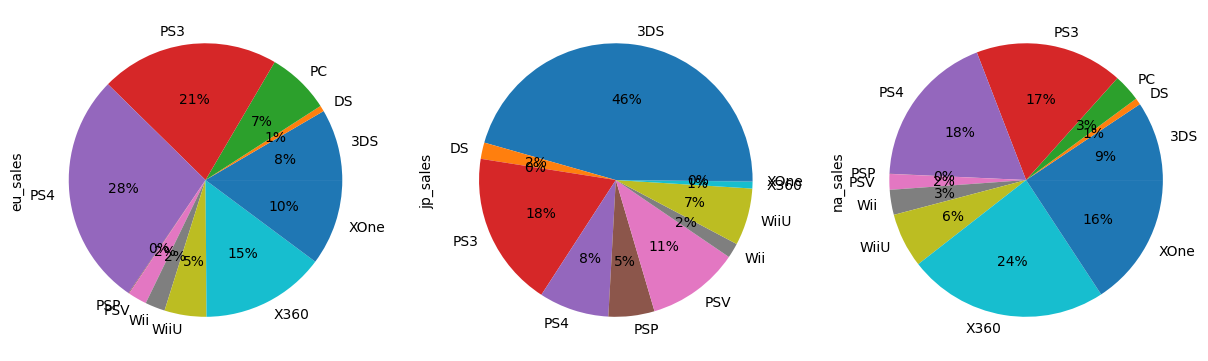

In [35]:
for i in ['na_sales','eu_sales','jp_sales']:
    #df.groupby('platform')[i].sum().sort_values(ascending=False).plot(kind='pie', legend=False,autopct='%1.0f%%',subplots=False)
    display(i,df.groupby('platform')[i].sum().sort_values(ascending=False).head(5))
    display(df.pivot_table(index='platform',  values=i, aggfunc='median').sort_values(by=i,ascending=False).T)

(df.pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')).plot(kind='pie', legend=False,autopct='%1.0f%%',figsize=(15,15),subplots=True);

In [36]:
df.pivot_table(index='genre',  values='sum_sales', aggfunc='median').sort_values(by='sum_sales',ascending=False).T

genre,Shooter,Sports,Platform,Role-Playing,Racing,Fighting,Action,Misc,Simulation,Strategy,Puzzle,Adventure
sum_sales,0.44,0.24,0.21,0.14,0.14,0.13,0.12,0.12,0.12,0.08,0.04,0.03


#### Вывод. Самые популярные платформы:
1. NA
X360   24%
PS4    18%
PS3    17%
XOne    16%
3DS     9%
2. EU
PS4    24%
PS3    21%
X360    15%
XOne    10%
3DS     8%
3. JP
3DS    46%
PS3    18%
PSV    11%
PS4    8%
WiiU   7%

В европе и америке первые три места (по 15-24%) x360, PS4, PS3. 4е- XOne, 5е - 3DS(8-9%). В японии на первом месте 3DS - 46%, а XOne не вошел в 5ку.

Самые продаваемые игры в EU и NA для платформы X360, в JP - 3DS

### Самые популярные жанры (топ-5).


genre,Shooter,Platform,Sports,Fighting,Racing,Action,Role-Playing,Misc,Adventure,Puzzle,Simulation,Strategy
na_sales,0.20,0.09,0.08,0.05,0.04,0.02,0.02,0.01,0.00,0.00,0.00,0.00


genre,Shooter,Racing,Platform,Sports,Simulation,Action,Fighting,Misc,Puzzle,Role-Playing,Strategy,Adventure
eu_sales,0.17,0.09,0.08,0.05,0.03,0.02,0.02,0.01,0.01,0.01,0.01,0.00


genre,Role-Playing,Fighting,Misc,Action,Adventure,Platform,Puzzle,Racing,Shooter,Simulation,Sports,Strategy
jp_sales,0.06,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00


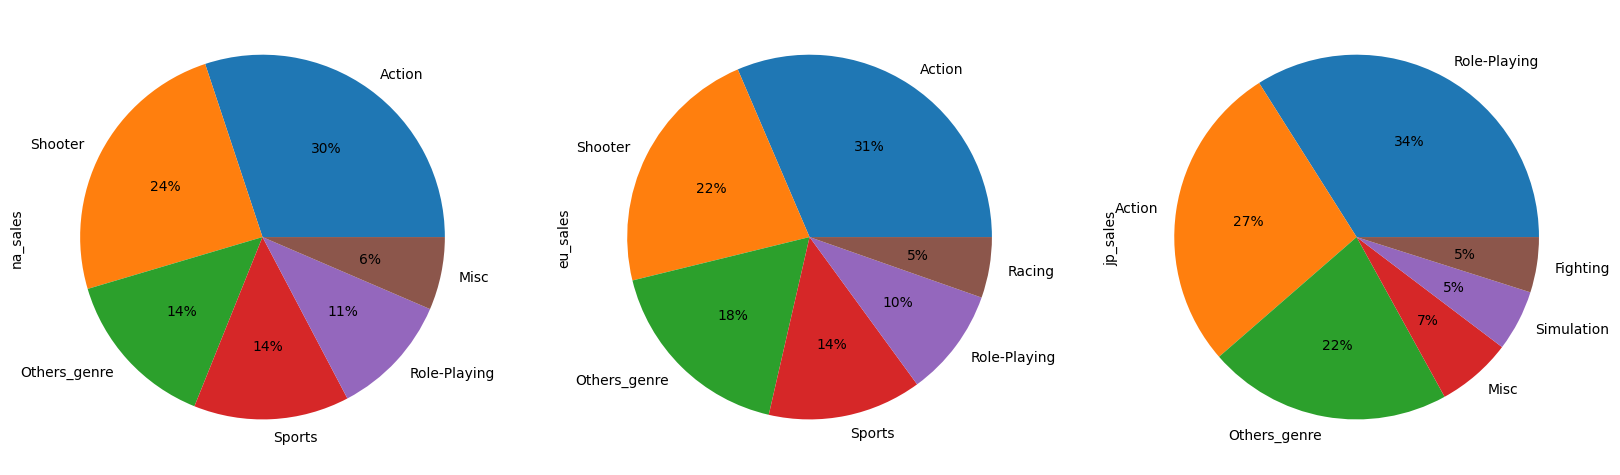

In [37]:
fig = plt.figure(figsize=(20,10))
for j,i in enumerate(['na_sales','eu_sales','jp_sales']):
    index_i = df.groupby('genre')[i].sum().sort_values(ascending=False).head(5).index
    df['genre_temp'] = df['genre']
    df.loc[~df['genre_temp'].isin(index_i),'genre_temp'] = 'Others_genre'
    ax = fig.add_subplot(1, 3, j+1)
    df.groupby('genre_temp')[i].sum().sort_values(ascending=False).plot(ax=ax,kind='pie', legend=False,autopct='%1.0f%%')
    display(df.pivot_table(index='genre',  values=i, aggfunc='median').sort_values(by=i,ascending=False).T)

plt.show()


####  Вывод. Самые популярные жанры:
- NA Action, Shooter, Sports, Role-Playing, Misc
- EU Action, Shooter, Sports, Role-Playing, Racing
- JP Role-Playing, Action, Misc, Simulation, Fighting

В европе и америке первые четыре места совпадают Action, Shooter, Sports, Role-Playing.

В японии на первом месте Role-Playing, в отличии от NA и EU популярны Simulation и Fighting

Самые продаваемые игры в EU и NA для жанра Shooter, в JP - Role-Playing

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

'na_sales'

rating
M          231.57
E          114.37
NotRated   103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

rating,M,E10+,E,T,NotRated
na_sales,0.15,0.13,0.07,0.05,0.00


'eu_sales'

rating
M          193.96
E          113.03
NotRated    91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

rating,M,E10+,E,T,NotRated
eu_sales,0.13,0.11,0.06,0.04,0.00


'jp_sales'

rating
NotRated   108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

rating,NotRated,T,E,E10+,M
jp_sales,0.03,0.01,0.00,0.00,0.00


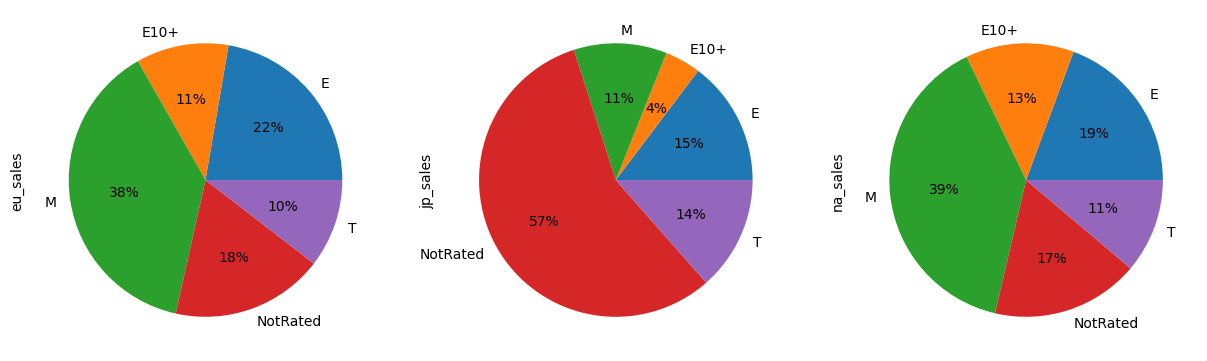

In [38]:
for i in ['na_sales','eu_sales','jp_sales']:
    display(i,df.groupby('rating')[i].sum().sort_values(ascending=False))
    display(df.pivot_table(index='rating',  values=i, aggfunc='median').sort_values(by=i,ascending=False).T)

(df.pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')).plot(kind='pie', legend=False,autopct='%1.0f%%',figsize=(15,15),subplots=True);

####  Вывод

В Европе и Америке наиболее популярны игры с рейтингом M (17+), затем E (6+), игры без рейтинга, E10+, T (13-19).
В Японии популярны игры, не локализованные в NA (не имеют рейтинга ESRB),- 57%, среди локализованных - популярность игр E,T, M, E10+
Самые продаваемые игры в EU и NA с рейтингом М, в JP - NotRated


### Общий вывод по регионам
Продажи в Европе и Америке достаточно похожи по платформам, жанрам и рейтингу, продажи в Японии значительно отличаются от них.

## Проверка гипотез
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Необходимо проверить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Формулируется нулевая гипотеза, что рейтинги равны, и первая гипотеза, что рейтинги различаются.

В распоряжении две выборки из генеральных совокупностей продаж.

Для этого используется метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var).

Необходимо проверить размер выборок, если размеры не равны, то выбирается параметр с неравными дисперсиями, уровень значимости задается равным 0,01

In [39]:
alpha = .01
dff=df.query('user_score > 0')
equal_var = len(dff.query('platform == "XOne"')) == len(dff.query('platform == "PC"'))

results = st.ttest_ind(
    dff.query('platform == "XOne"')['user_score'], 
    dff.query('platform == "PC"')['user_score'],equal_var=equal_var)

print(f'p-значение для двухсторонней гипотезы:  {results.pvalue}')
print('Проверка двухсторонней гипотезы')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    
print(f'''Cредний пользовательский рейтинг платформы Xbox One: {dff.query('platform == "XOne"')['user_score'].mean():.2f}''')
print(f'''Cредний пользовательский рейтинг платформы PC: {dff.query('platform == "PC"')['user_score'].mean():.2f}''')

p-значение для двухсторонней гипотезы:  0.5489537965134912
Проверка двухсторонней гипотезы
Не получилось отвергнуть нулевую гипотезу
Cредний пользовательский рейтинг платформы Xbox One: 6.52
Cредний пользовательский рейтинг платформы PC: 6.43


 #### Вывод

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 0.54. Поэтому нулевая гипотеза не может быть отвергнута, т.е. отличия в средних пользовательских рейтингах платформ Xbox One и PC относительно не велики.

### Средние пользовательские рейтинги жанров Action и Sports разные.
Необходимо проверить, что средние пользовательские рейтинги жанров Action и Sports разные.

Формулируется нулевая гипотеза, что рейтинги равны, и первая гипотеза, что рейтинги различаются.

В распоряжении две выборки из генеральных совокупностей продаж.

Для этого используется специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2,equal_var).

Необходимо проверить размер выборок, если размеры не равны, то выбирается параметр с неравными дисперсиями, уровень значимости задается равным 0,01

Дополнительно проверяется гипотеза о том, что средний пользовательский рейтинг жанра Action больше, чем для жанра Sports.

In [40]:
alpha = .01
dff=df.query('user_score > 0')
equal_var = len(dff.query('genre == "Action"')) == len(dff.query('genre == "Sports"'))

results = st.ttest_ind(
    dff.query('genre == "Action"')['user_score'], 
    dff.query('genre == "Sports"')['user_score'],equal_var=equal_var)

print(f'p-значение для двухсторонней гипотезы:  {results.pvalue}; для односторонней гипотезы: {results.pvalue / 2}')
print('Проверка двухсторонней гипотезы')
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
print('Проверка односторонней гипотезы')
if (results.pvalue < alpha) and  dff.query('genre == "Sports"')['user_score'].mean() <  dff.query('genre == "Action"')['user_score'].mean():
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")  
    
print(f'''Cредний пользовательский рейтинг жанра Action: {dff.query('genre == "Action"')['user_score'].mean():.2f}''')
print(f'''Cредний пользовательский рейтинг жанра Sports: {dff.query('genre == "Sports"')['user_score'].mean():.2f}''')

p-значение для двухсторонней гипотезы:  4.24307776572644e-20; для односторонней гипотезы: 2.12153888286322e-20
Проверка двухсторонней гипотезы
Отвергаем нулевую гипотезу
Проверка односторонней гипотезы
Отвергаем нулевую гипотезу
Cредний пользовательский рейтинг жанра Action: 6.83
Cредний пользовательский рейтинг жанра Sports: 5.46


 #### Вывод

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 4.24e-20. Поэтому нулевая гипотеза отвергается, т.е. средние пользовательские рейтинги жанров Action и Sports разные.
Кроме того, по результатам одностороннего теста не отвергается гипотеза о том, что средний пользовательский рейтинг жанра Action больше, чем для жанра Sports.

## Общий вывод

**1. Открыт файл с данными и изучена общая информация**

В таблице 16715 записей по 11 параметров, в 6 столбцах присутствуют NaN. Изучено описание данных.


**2. Подготовка данных**

2.1. Выполнена замена названия столбцов (приведены к змеиному регитру).

2.2. Преобразованы данные в целые и вещественные типы. Год и рейтинг критиков из вещественных в целые.

2.3. Пропуски в названиях игр и годах выпуска удалены, т.к. таких пропусков мало (2 и 269 из 16715строк). 
Значения tbd (рейтинг еще не определен) и пропуски в рейтингах заполнены нулями и значениями "NotRated"(около половины записей без рейтинга)

2.4. Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.

**3. Исследовательский анализ данных**

3.1. Проанализировано сколько игр выпускалось в разные годы и важны ли данные за все периоды.

Распределение числа компьютерных игр имеет сложный характер:

- в период "зарождения" с 1980 до 1993 г. выпускалось не более 100 игр в год
- с 1994 быстрый рост числа выпускаемых в год игр со 100 до 1400 в 2008,2009 гг.
- 2009-2012 гг. резкий спад
- в 2012-2016 равномерное распределение, ежегодно выпускалось по 500-600 игр. 

Отвечая на вопрос "Важны ли данные за все периоды?", можно предположить, что наиболее репрезентативны данные за последний равномерный период 2012-2016 гг.

3.2. Проанализировано как менялись продажи по платформам.

3.2.1.
- Как менялись продажи по платформам. 
Продажи на ПК были 26 лет, на 3х платформах продажи были только по одному году. Большинство платформ имеют 3 периода: роста, сохранения и спада популярности.
- За какой характерный срок появляются новые и исчезают старые платформы?
Для всех платформ средняя и медианная длительности продаж составили 7,68 и 7 лет. Но 10 непопулярных платформ из 31 имеют менее 0.5% продаж, они были исключены из рассмотрения. Тогда для "успешных" платформ средняя и медианная длительности продаж составили 9,81 и 10 лет.

3.2.2. В качестве актуального периода для прогнозов на 2017 г. принимается период 2012-2016гг - период равномерного распределиния числа игр по годам.

3.2.3. К концу актуального периода используются платформы 3DS, PC, PS4, XOne (PS3, X360 практически вышли из употребления), а также мало популярные PSV и WiiU. При этом популярность всех платформ падает.
Потенциально наиболее прибыльные платформы и их продажи в 2016 г. 1. PS4 69.25, 2.XOne 26.15, 3. 3DS 15.14, прочие платформы: PC 5.25, WiiU 4.60, PSV 4.25, PS3 3.60, X360 1.52, Wii 0.18 

3.3. Построены графики «ящик с усами» по глобальным продажам игр в разбивке по платформам. Наибольшее медианное значение глобальных продаж наблюдается для платформы X360 т.е. игра выходящая на X360 более продаваема, но на платформе выходит относительно малая доля игр.

3.4. Проанализировано, как влияют отзывы пользователей и критиков на продажи внутри одной популярной платформы

Построена диаграмма рассеяния и посчитаны коэффициенты корреляции между отзывами и продажами. Результаты соотнесены с продажами игр на других платформах:
- Для PS3, PS4, XOne, X360  : количество продаж не коррелирует с пользовательским рейтингом; количество продаж слабо коррелирует с рейтингом критиков.
- Для 3DS коэффициент корреляции продаж с рейтингом критиков ниже, с рейтингом пользователей выше. 
- Для PSV коэффициенты корреляции менее 0,1.
- Для PC очень слабые связи, при этом с пользовательским связь обратная.
- Согласно диаграмам рассеяния для текущих популярных платформ практически нет игр в области высоких продаж и низких рейтингов, т.е. игры с низким рейтингом не будут популярны, однако высокий рейтинг тоже не гарантирует высоких продаж, т.к. область высоких рейтингов и нижних продаж на диаграммах рассеяния не пустая.
Рейтинг критиков по сравнению с рейтингом пользователей имеет меньший разброс на диаграмах рассеяния, и поэтому рейтинг критиков лучше подходит для прогнозирования. Коэффициенты корреляции подтверждают выводы.

3.5.  Общее распределение игр по жанрам

Наиболее популярный жанр Shooter. Жанры с высокими медианными продажами - Sports, Platform, Role-Playing, Racing, с низкими Puzzle, Adventure

**4.  Портрет пользователя каждого региона**

4.1.  Самые популярные платформы в разных регионах и их доли:
- NA: X360 (24%), PS4 (18%), PS3 (17%), XOne (16%), 3DS (9%)
- EU: PS4 (24%), PS3 (21%), X360 (15%), XOne (10%), 3DS (8%) 
- JP: 3DS (46%), PS3 (18%), PSV (11%), PS4 (8%), WiiU (7%)

В европе и америке первые три места (по 15-24%) x360, PS4, PS3. 4е- XOne, 5е - 3DS(8-9%). В японии на первом месте 3DS - 46%, а XOne не вошел в 5ку.
Самые продаваемые игры в EU и NA для платформы X360, в JP - 3DS


4.2. Определены самые популярные жанры игр по регионам:
- NA: Action, Shooter, Sports, Role-Playing, Misc
- EU: Action, Shooter, Sports, Role-Playing, Racing
- JP: Role-Playing, Action, Misc, Simulation, Fighting

В европе и америке первые четыре места совпадают Action, Shooter, Sports, Role-Playing.
В японии на первом месте Role-Playing, в отличии от NA и EU в 5ку вошли Simulation и Fighting
Самые продаваемые игры в EU и NA жанра Shooter, в JP - Role-Playing


4.3. Определено влияние рейтинга ESRB на продажи в отдельном регионе.
В Европе и Америке наиболее популярны игры с рейтингом M (17+), затем E (6+), NotRated, E10+, T (13-19). В Японии популярны игры, не локализованные в NA (NotRated не имеют рейтинга ESRB),- 57%, среди локализованных в NA популярность игр по убыванию E,T, M, E10+.

Самые продаваемые игры в EU и NA с рейтингом М, в JP - NotRated

Таким образом, продажи (пользователи) в Европе и Америке достаточно похожи по платформам, жанрам и рейтингу, продажи (пользователи) в Японии значительно отличаются от них.

**5. Проверка гипотез**

5.1. Проверена гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Cредний пользовательский рейтинг платформы Xbox One: 6.52
Cредний пользовательский рейтинг платформы PC: 6.43
Методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (scipy.stats.ttest_ind (array1, array2,equal_var)) рассчитана вероятность p-value. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 0.54. Поэтому нулевая гипотеза не может быть отвергнута, т.е. отличия в средних пользовательских рейтингах платформ Xbox One и PC относительно не велики..


5.2. Проверена гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

Cредний пользовательский рейтинг жанра Action: 6.83
Cредний пользовательский рейтинг жанра Sports: 5.46
Методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам (scipy.stats.ttest_ind (array1, array2,equal_var)) рассчитана вероятность p-value. Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно 4.24e-20. Поэтому нулевая гипотеза (о равенстве) отвергается, т.е. средние пользовательские рейтинги жанров Action и Sports разные. Кроме того, по результатам одностороннего теста не отвергается гипотеза о том, что средний пользовательский рейтинг жанра Action больше, чем для жанра Sports.



**ОБЩИЙ ВЫВОД**

Рекламные кампании интернет-магазина «Стримчик» необходимо спланировать с учетом потенциально наиболее популярных в 2017 г. продуктов: 
1. для Европейского рынка - игра в жанре Shooter с возрастным рейтингом M(17+) для платформы X360 с высоким рейтингом критиков
2. для Американского рынка - игра в жанре Shooter с возрастным рейтингом M(17+) для платформы X360 с высоким рейтингом критиков
3. для Японского рынка - игра в жанре **Role-Playing** с возрастным рейтингом **NotRated** для платформы **3DS** с высоким рейтингом критиков и **игроков**

